In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif,RFECV
from scikeras.wrappers import KerasClassifier
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
senior_citizen_churn = df[df['SeniorCitizen'] == 1]['Churn'].value_counts(normalize=True)
senior_citizen_churn

No     0.583187
Yes    0.416813
Name: Churn, dtype: float64

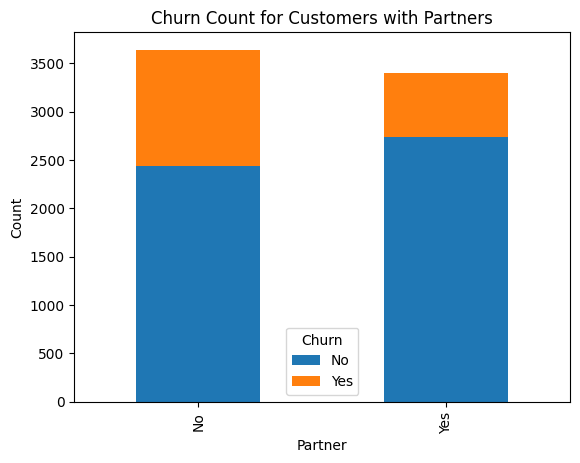

In [ ]:
partner_churn = df.groupby(['Partner', 'Churn'])['customerID'].count().unstack()
partner_churn.plot(kind='bar', stacked=True)
plt.title('Churn Count for Customers with Partners')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

In [ ]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner',
            'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
X = df[features].copy()
y = df['Churn']

In [ ]:
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    X.loc[:, col] = label_encoders[col].fit_transform(X[col])

<ipython-input-61-11f26caf0b35>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col] = label_encoders[col].fit_transform(X[col])
<ipython-input-61-11f26caf0b35>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col] = label_encoders[col].fit_transform(X[col])
<ipython-input-61-11f26caf0b35>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are 

In [ ]:
X.replace(' ', np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

In [ ]:
label_encoder_y = LabelEncoder()

In [ ]:
y = label_encoder_y.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

tenure              0.181580
MonthlyCharges      0.180254
TotalCharges        0.166539
Contract            0.079064
PaymentMethod       0.052871
OnlineSecurity      0.041582
TechSupport         0.039296
OnlineBackup        0.028510
gender              0.028369
InternetService     0.026702
PaperlessBilling    0.025911
Partner             0.023138
DeviceProtection    0.022516
MultipleLines       0.022446
Dependents          0.020068
SeniorCitizen       0.019806
StreamingTV         0.017918
StreamingMovies     0.017896
PhoneService        0.005532
dtype: float64

In [ ]:
top_features= 10

In [ ]:
selected_top_features= feature_importance.index[:top_features]
selected_top_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod',
       'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'gender',
       'InternetService'],
      dtype='object')

In [ ]:
selected_X= X[selected_top_features]

In [ ]:
selected_X_train, selected_X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize data with selected features
scaler_of_selected_features = StandardScaler()
selected_X_train[selected_top_features] = scaler_of_selected_features.fit_transform(selected_X_train[selected_top_features])
selected_X_test[selected_top_features] = scaler_of_selected_features.transform(selected_X_test[selected_top_features])


Training

In [ ]:
!pip install scikeras[tensorflow]      # gpu compute platform
!pip install scikeras[tensorflow-cpu]

In [ ]:
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical

In [ ]:
#selected_X_train, selected_X_test, y_train, y_test = train_test_split(selected_X, y, test_size=0.2, random_state=42)

In [ ]:
label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

In [70]:
input_layer = Input(shape=(selected_X_train.shape[1],))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(45, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(16, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

In [71]:
model= Model(inputs=input_layer, outputs=output_layer)

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(selected_X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
141/141 [==============================] - 1s 8ms/step - loss: 0.2133 - accuracy: 0.9028 - val_loss: 0.8240 - val_accuracy: 0.7533
Epoch 2/100
141/141 [==============================] - 3s 20ms/step - loss: 0.2124 - accuracy: 0.9010 - val_loss: 0.8294 - val_accuracy: 0.7232
Epoch 3/100
141/141 [==============================] - 1s 9ms/step - loss: 0.2139 - accuracy: 0.9017 - val_loss: 0.7999 - val_accuracy: 0.7409
Epoch 4/100
141/141 [==============================] - 1s 8ms/step - loss: 0.2166 - accuracy: 0.8962 - val_loss: 0.8538 - val_accuracy: 0.7382
Epoch 5/100
141/141 [==============================] - 1s 6ms/step - loss: 0.2097 - accuracy: 0.9030 - val_loss: 0.8214 - val_accuracy: 0.7524
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.8975 - val_loss: 0.8042 - val_accuracy: 0.7551
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9004 - val_loss: 0.8120 - val_accuracy: 0.730

In [75]:
test_loss , test_accuracy = model.evaluate( selected_X_test,y_test)
test_accuracy

45/45 [==============================] - 0s 3ms/step - loss: 0.9592 - accuracy: 0.7637


0.7636621594429016

In [76]:
def create_model():
    input_layer = Input(shape=(selected_X_train.shape[1],))
    hidden_layer_1 = Dense(64, activation='relu')(input_layer)
    hidden_layer_2 = Dense(45, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(16, activation='relu')(hidden_layer_2)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [77]:
keras_model = KerasClassifier(build_fn=create_model, verbose=0)

In [78]:
param_grid = {
    'epochs': [100, 200, 150],
    'batch_size': [45, 64, 128]
}

In [79]:
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)

In [80]:
grid_result = grid.fit(selected_X_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [81]:
print(grid_result.best_params_ , " are the best parameters.")
print(grid_result.best_score_, " is the best score.")

{'batch_size': 128, 'epochs': 150}  are the best parameters.
0.888178913738019  is the best score.


In [83]:
best_params = grid_result.best_params_
best_model = create_model()
best_model.fit(selected_X_train, y_train_encoded,epochs = best_params['epochs'],batch_size=best_params['batch_size'],verbose=1)
best_model.save("bestmodel.h5")

Epoch 1/150
45/45 [==============================] - 3s 7ms/step - loss: 0.1032 - accuracy: 0.9524
Epoch 2/150
45/45 [==============================] - 0s 7ms/step - loss: 0.1101 - accuracy: 0.9519
Epoch 3/150
45/45 [==============================] - 0s 5ms/step - loss: 0.0996 - accuracy: 0.9574
Epoch 4/150
45/45 [==============================] - 0s 5ms/step - loss: 0.0993 - accuracy: 0.9581
Epoch 5/150
45/45 [==============================] - 0s 5ms/step - loss: 0.0879 - accuracy: 0.9620
Epoch 6/150
45/45 [==============================] - 0s 5ms/step - loss: 0.1086 - accuracy: 0.9508
Epoch 7/150
45/45 [==============================] - 0s 7ms/step - loss: 0.1286 - accuracy: 0.9473
Epoch 8/150
45/45 [==============================] - 0s 5ms/step - loss: 0.0934 - accuracy: 0.9583
Epoch 9/150
45/45 [==============================] - 0s 5ms/step - loss: 0.0836 - accuracy: 0.9629
Epoch 10/150
45/45 [==============================] - 0s 5ms/step - loss: 0.1205 - accuracy: 0.9539
Epoch 11/

In [ ]:
#model.save('Customer_Churn.h5')

In [ ]:
test_accuracy = best_model.score(selected_X_test, y_test_encoded)
test_accuracy*100

In [ ]:
y_pred_proba = best_model.predict_proba(selected_X_test)
positive=y_pred_proba[:,1]

In [86]:
auc_score = roc_auc_score(y_test_encoded, positive)
print(auc_score, " is the auc score.")

0.8376359891105198  is the auc score.


In [84]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_of_selected_features, scaler_file)